<a href="https://colab.research.google.com/github/thepbordin/Obstacle-Detection-for-Blind-people/blob/main/Duduckgo_Image_API_Scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install fastbook**

In [ ]:
!pip install -q fastbook
exit()

     |████████████████████████████████| 719 kB 26.5 MB/s 
     |████████████████████████████████| 197 kB 35.9 MB/s 
     |████████████████████████████████| 346 kB 55.5 MB/s 
     |████████████████████████████████| 4.2 MB 49.9 MB/s 
     |████████████████████████████████| 1.2 MB 66.8 MB/s 
     |████████████████████████████████| 59 kB 5.7 MB/s 
     |████████████████████████████████| 86 kB 4.3 MB/s 
     |████████████████████████████████| 212 kB 12.0 MB/s 
     |████████████████████████████████| 1.1 MB 30.6 MB/s 
     |████████████████████████████████| 140 kB 49.1 MB/s 
     |████████████████████████████████| 86 kB 1.9 MB/s 
     |████████████████████████████████| 596 kB 35.4 MB/s 
     |████████████████████████████████| 127 kB 72.2 MB/s 
     |████████████████████████████████| 94 kB 3.1 MB/s 
     |████████████████████████████████| 144 kB 57.7 MB/s 
     |████████████████████████████████| 271 kB 66.8 MB/s 
     |████████████████████████████████| 112 kB 71.3 MB/s 
     |████████████████

In [ ]:
from fastbook import *
from tqdm.auto import tqdm

#download from duckduckgo
def search_images_ddg(key, max_n=1000):
     """Search for 'key' with DuckDuckGo and return a unique urls of 'max_n' images
        (Adopted from https://github.com/deepanprabhu/duckduckgo-images-api)
     """
     url        = 'https://duckduckgo.com/'
     params     = {'q':key}
     res        = requests.post(url,data=params)
     searchObj  = re.search(r'vqd=([\d-]+)\&',res.text)
     if not searchObj: print('Token Parsing Failed !'); return
     requestUrl = url + 'i.js'
     headers    = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:71.0) Gecko/20100101 Firefox/71.0'}
     params     = (('l','us-en'),('o','json'),('q',key),('vqd',searchObj.group(1)),('f',',,,'),('p','1'),('v7exp','a'))
     urls       = []
     while True:
         try:
             res  = requests.get(requestUrl,headers=headers,params=params)
             data = json.loads(res.text)
             for obj in data['results']:
                 urls.append(obj['image'])
                 max_n = max_n - 1
                 if max_n < 1: return L(set(urls))     # dedupe
             if 'next' not in data: return L(set(urls))
             requestUrl = url + data['next']
         except:
             pass

In [ ]:
#save ไว้ที่ไหน
path = Path('images')
#เอารูปอะไรบ้าง (labels)
labels = ['windows']
#เอา label ละกี่รูป
MAX_N = 1000

if not path.exists():
    path.mkdir()
    for l in tqdm(labels):
        dest = (path/l)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(l, max_n=MAX_N)
        download_images(dest, urls=results)

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from PIL import Image

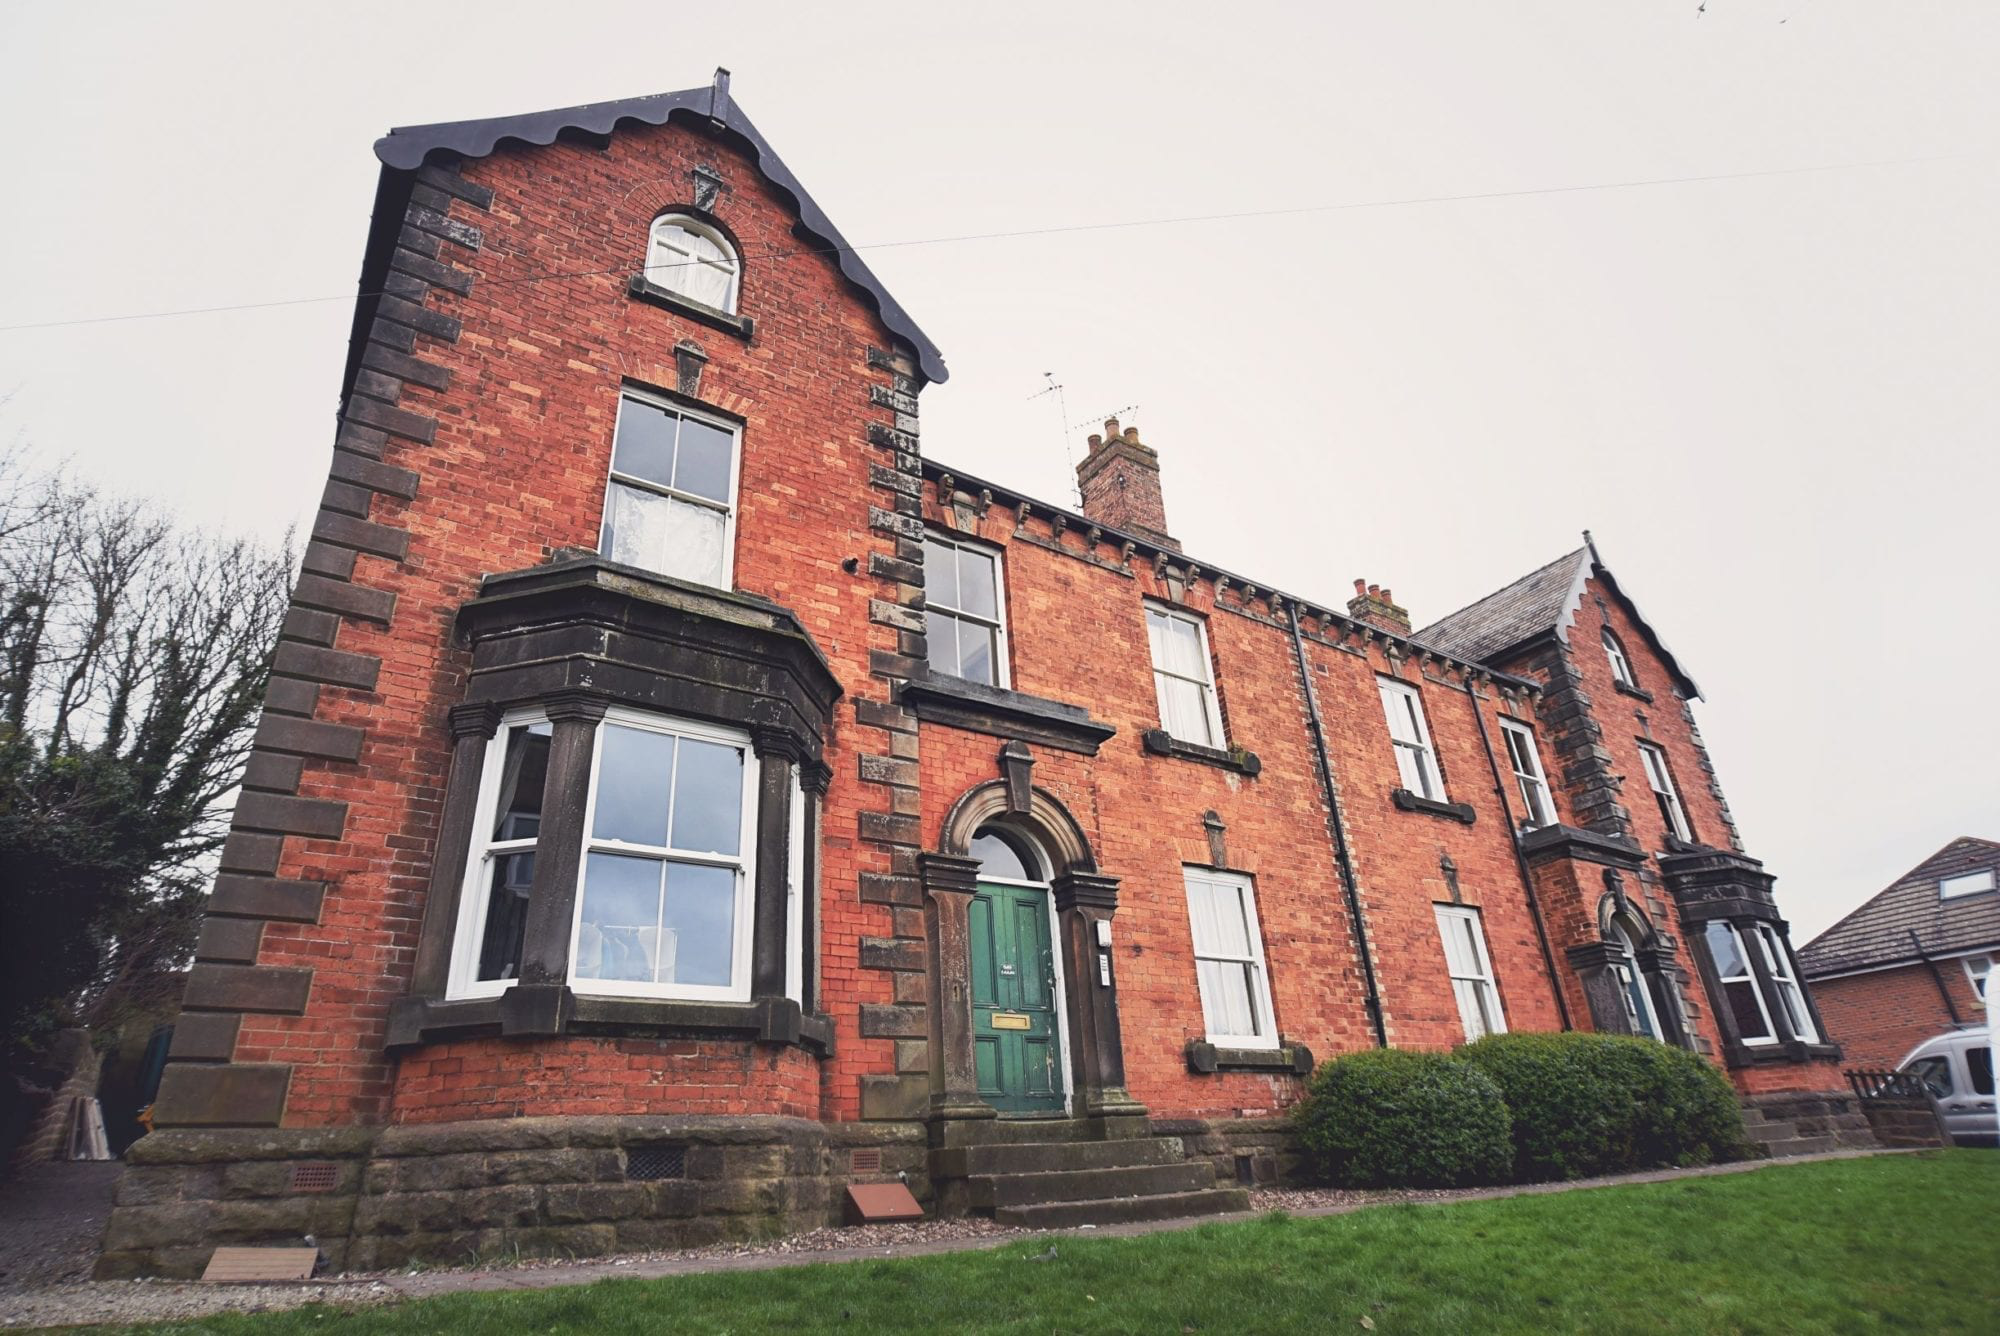

In [ ]:
Image.open(get_image_files(path)[10])

In [ ]:
#เช็คว่าได้รูปอะไรบ้าง
fns = get_image_files(path)
fns

(#676) [Path('images/windows/00000058.png'),Path('images/windows/00000641.jpg'),Path('images/windows/00000240.jpg'),Path('images/windows/00000569.jpg'),Path('images/windows/00000288.jpg'),Path('images/windows/00000052.jpg'),Path('images/windows/00000396.jpg'),Path('images/windows/00000658.jpg'),Path('images/windows/00000247.jpg'),Path('images/windows/00000392.jpg')...]

In [ ]:
#ดูว่าหารูปไหนไม่เจอบ้าง
failed = verify_images(fns)
failed.map(Path.unlink)

(#8) [None,None,None,None,None,None,None,None]

# **Zip File**

In [ ]:
from zipfile import ZipFile
import os

In [ ]:
  
def get_all_file_paths(directory):
  
    # initializing empty file paths list
    file_paths = []
  
    # crawling through directory and subdirectories
    for root, directories, files in os.walk(directory):
        for filename in files:
            # join the two strings in order to form the full filepath.
            filepath = os.path.join(root, filename)
            file_paths.append(filepath)
  
    # returning all file paths
    return file_paths        
  
def main():
    # path to folder which needs to be zipped
    directory = './images/indoor corridor'
  
    # calling function to get all file paths in the directory
    file_paths = get_all_file_paths(directory)
  
    # printing the list of all files to be zipped
    print('Following files will be zipped:')
    for file_name in file_paths:
        print(file_name)
  
    # writing files to a zipfile
    with ZipFile('images.zip','w') as zip:
        # writing each file one by one
        for file in file_paths:
            zip.write(file)
        print('All files zipped successfully!')        
  
  
if __name__ == "__main__":
    main()

Following files will be zipped:
./images/indoor corridor/00000159.jpg
./images/indoor corridor/00000748.jpg
./images/indoor corridor/00000390.jpg
./images/indoor corridor/00000160.jpg
./images/indoor corridor/00000411.jpg
./images/indoor corridor/00000815.jpg
./images/indoor corridor/00000727.jpg
./images/indoor corridor/00000468.jpg
./images/indoor corridor/00000356.jpg
./images/indoor corridor/00000653.jpg
./images/indoor corridor/00000756.jpg
./images/indoor corridor/00000305.jpg
./images/indoor corridor/00000593.jpg
./images/indoor corridor/00000509.jpg
./images/indoor corridor/00000638.jpg
./images/indoor corridor/00000091.jpg
./images/indoor corridor/00000107.jpg
./images/indoor corridor/00000681.jpg
./images/indoor corridor/00000092.jpg
./images/indoor corridor/00000686.jpg
./images/indoor corridor/00000475.jpg
./images/indoor corridor/00000670.jpg
./images/indoor corridor/00000627.jpg
./images/indoor corridor/00000353.jpg
./images/indoor corridor/00000195.jpg
./images/indoor co